# Cat vs. Dog Classifier

In [1]:
# pip install opencv-python

In [62]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.utils import shuffle

### getting data

In [5]:
labels = ['cat', 'dog'] # cat will be 0, dog will be 1
folders = ['train', 'test']
img_size = (128, 128)

def get_data(path):
    data = []
    i = 0
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, image))
        image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB) # converting color code so matplotlib can show proper colors
        resized_image = cv2.resize(image_array, img_size) # resizing images to put them all in one shape
            
        if labels[0] in os.listdir(path)[i]: # assigning 0 to cat images
            y = 0
        elif labels[1] in os.listdir(path)[i]:# assigning 1 to dog images
            y = 1
        else: # for the test data we don't know the labels, so assigning None
            y = None
            
        i+=1
            
        data.append([resized_image, y])
        
    return np.array(data)

In [7]:
test_data = get_data('C:/Users/gusta/personal_projects/dog_cat_detection/data/test')

C:\Users\gusta\AppData\Local\Temp\ipykernel_2900\8069416.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [12]:
train_data = get_data('C:/Users/gusta/personal_projects/dog_cat_detection/data/train')

C:\Users\gusta\AppData\Local\Temp\ipykernel_2900\8069416.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


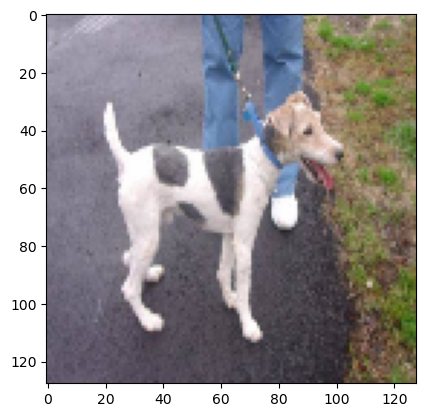

In [8]:
plt.imshow(test_data[55][0])

In [13]:
test_data[55][1]

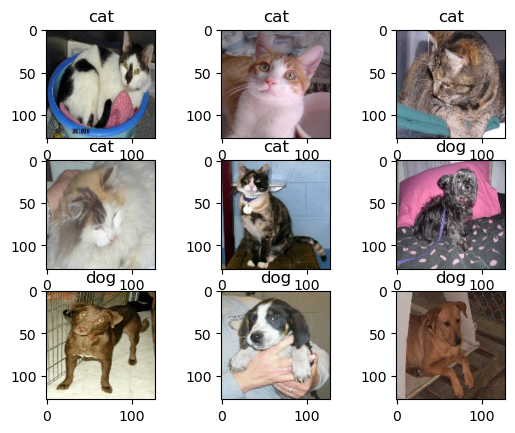

In [35]:
for imagem in range(9):
    plt.subplot(3,3, imagem+1)
    plt.imshow(train_data[imagem+12495][0])
    plt.title(labels[train_data[imagem+12495][1]])

In [63]:
# separating features and y

x_train = []
y_train = []

for i in range(len(train_data)):
    x_train.append(train_data[i][0])
    y_train.append(train_data[i][1])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

x_train_shf, y_train_shf = shuffle(x_train, y_train, random_state=42) # shuffling the data before training the model

### 1st model

In [72]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(128,128,3)),
    keras.layers.Dense(units=256, activation=tf.nn.relu),
    keras.layers.Dense(units=2, activation=tf.nn.softmax)
])

model_1.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 49152)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               12583168  
                                                                 
 dense_9 (Dense)             (None, 2)                 514       
                                                                 
Total params: 12583682 (48.00 MB)
Trainable params: 12583682 (48.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
history_model_1 = model_1.fit(x_train_shf, y_train_shf, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
79/79 [==============================] - 61s 768ms/step - loss: 1629.1699 - accuracy: 0.5200 - val_loss: 1217.9818 - val_accuracy: 0.4956
Epoch 2/10
79/79 [==============================] - 55s 701ms/step - loss: 1171.4713 - accuracy: 0.5235 - val_loss: 1075.4397 - val_accuracy: 0.5300
Epoch 3/10
79/79 [==============================] - 63s 794ms/step - loss: 607.3154 - accuracy: 0.5412 - val_loss: 294.4742 - val_accuracy: 0.5398
Epoch 4/10
79/79 [==============================] - 56s 705ms/step - loss: 390.1500 - accuracy: 0.5477 - val_loss: 398.9617 - val_accuracy: 0.5148
Epoch 5/10
79/79 [==============================] - 63s 805ms/step - loss: 417.6581 - accuracy: 0.5417 - val_loss: 385.6115 - val_accuracy: 0.5206
Epoch 6/10
79/79 [==============================] - 63s 802ms/step - loss: 376.8058 - accuracy: 0.5536 - val_loss: 573.5054 - val_accuracy: 0.4946
Epoch 7/10
79/79 [==============================] - 64s 808ms/step - loss: 562.7495 - accuracy: 0.5213 - val_loss:

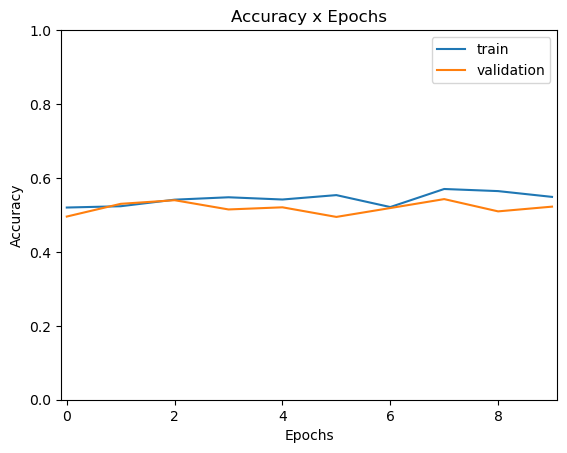

In [84]:
# accuracy plot

plt.plot(history_model_1.history['accuracy'])
plt.plot(history_model_1.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.title('Accuracy x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(-0.1,9.1)
plt.ylim(0, 1)
plt.show()

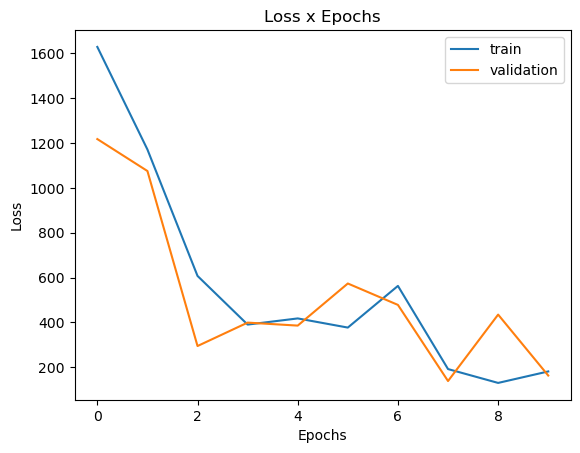

In [85]:
# loss plot

plt.plot(history_model_1.history['loss'])
plt.plot(history_model_1.history['val_loss'])
plt.legend(['train', 'validation'])
plt.title('Loss x Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()